Estadístico de prueba ADF: -40.37544908777364
Valor p: 0.0


<Figure size 1200x600 with 0 Axes>

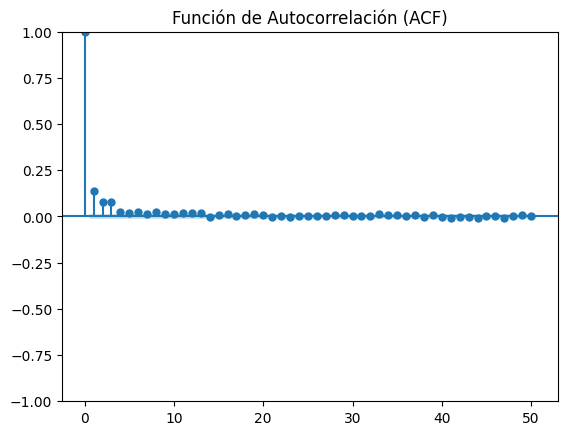

<Figure size 1200x600 with 0 Axes>

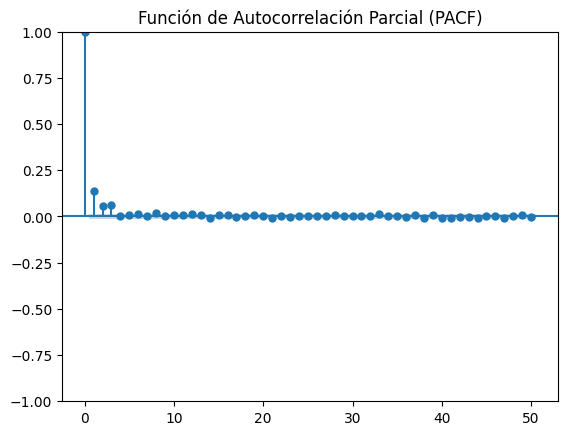

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
df = pd.read_excel(r"C:\Users\mi compu\Documents\Visual studio\Interlub_hackaton\df_final.xlsx", 
                   parse_dates=['Creacion Orden de Venta'], index_col='Creacion Orden de Venta')

# Seleccionar la columna de 'Cantidad' como la serie temporal
serie = df['Cantidad']

# Eliminar los valores faltantes (NaN)
serie = serie.dropna()

# Comprobación de estacionariedad con el test de Dickey-Fuller
result_adf = adfuller(serie)
print(f'Estadístico de prueba ADF: {result_adf[0]}')
print(f'Valor p: {result_adf[1]}')

# Si el valor p es mayor que 0.05, la serie no es estacionaria y necesita diferenciación
if result_adf[1] > 0.05:
    print("La serie no es estacionaria, aplicando diferenciación.")
    serie_diff = serie.diff().dropna()  # Aplicar diferenciación
else:
    serie_diff = serie  # Si ya es estacionaria, usar la serie original

# Graficar la ACF (Función de Autocorrelación)
plt.figure(figsize=(12, 6))
plot_acf(serie_diff, lags=50)  # Se pueden ajustar los lags según sea necesario
plt.title('Función de Autocorrelación (ACF)')
plt.show()

# Graficar la PACF (Función de Autocorrelación Parcial)
plt.figure(figsize=(12, 6))
plot_pacf(serie_diff, lags=50)  # Se pueden ajustar los lags según sea necesario
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()


